In [1]:
import numpy as np
import pandas as pd
import pylab as pl
import os
import time
from itertools import chain

In [2]:
data = np.loadtxt("../../data/TracingTheCosmicWeb_PublicData/fof_catalog_200Mpc512.txt", skiprows=3)
N_real = len(data)
data = data[:N_real,[1,2,3]]
idx = np.arange(0,N_real)
x = data[:,0]
y = data[:,1]
z = data[:,2]

In [3]:
df = pd.DataFrame(np.c_[idx, x, y, z], columns=['ID','X','Y','Z'])
np.savetxt('./data/TCW_pos_real.txt',df.values, fmt='%d', header='id px py pz')

In [4]:
len(idx)

281465

In [5]:
f = open('./data/TCW_pos_real.txt.NDnet_s3.52.up.NDskl.S010.a.NDskl')
doc = f.readlines()

In [6]:
doc = np.array(doc)
ii = np.where(doc=='[FILAMENTS]\n')[0][0]
N_fila = int(doc[ii+1])

In [7]:
FILA = np.zeros(N_fila, dtype=object)

/tmp/ipykernel_83369/1957546861.py:16: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "renderized" which is no longer supported as of 3.3 and will become an error in 3.6
  pl.savefig('./figs/TCW_filaments.pdf', bbox_inches='tight', renderized=True)


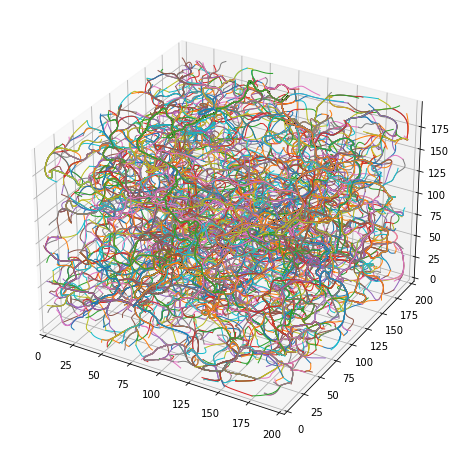

In [8]:
jj = ii+2
# print(doc[jj][0].replace('\n','').split(' ')[2])
fig = pl.figure(figsize=(8,8), rasterized=True)
ax = pl.axes(projection='3d')

for i in range(N_fila):
    jj_new = jj + int(doc[jj].replace('\n','').split(' ')[2]) + 1
    FILA[i] = np.array([a.replace('\n','').split(' ')[1:] for a in doc[jj+1:jj_new]], dtype=float)
    # print(jj,jj_new)
    # print(doc[jj].replace('\n',''),doc[jj_new])
    ax.plot3D(FILA[i][:,0], FILA[i][:,1], FILA[i][:,2], lw=1) 
    jj = jj_new

pl.xlim(0,200)
pl.ylim(0,200)
pl.savefig('./figs/TCW_filaments.pdf', bbox_inches='tight', renderized=True)
pl.show()

In [9]:
FILA[0]

array([[ 16.5    ,   7.5    ,  94.5    ],
       [ 17.1072 ,   6.45134,  92.3345 ],
       [ 17.4932 ,   5.67898,  90.2803 ],
       ...,
       [110.211  , 167.854  , 197.62   ],
       [110.632  , 167.915  , 198.337  ],
       [111.     , 168.     , 199.     ]])

In [10]:
fila_points = np.array(list(chain(*FILA)))

In [11]:
len(fila_points)

1788484

In [12]:
# fig = pl.figure(figsize=(8,8), rasterized=True)
# ax = pl.axes(projection='3d')
# ax.scatter3D(fila_points[:,0], fila_points[:,1], fila_points[:,2], s=0.2)
# ax.scatter3D(x, y, z, s=0.2)
# pl.show()

In [13]:
pos_ = np.array([x[0],y[0],z[0]])
pos_

array([141.6838, 168.7701,  18.8034])

In [14]:
f = open('./data/TCW_pos_real.txt.NDnet_s3.52.up.NDskl.S010.a.segs')
doc2 = f.readlines()
f.close()

In [15]:
N_segs = int(doc2[2].replace('\n','').split(' ')[1])
N_segs

1782686

In [16]:
SEGMENTS_SRT = np.array(doc2)[3:]

In [17]:
SEGMENTS = np.array([np.array(f.split(' '), dtype=float) for f in SEGMENTS_SRT])

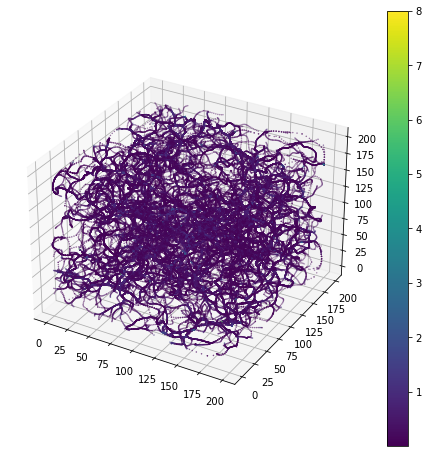

In [22]:
fig = pl.figure(figsize=(8,8), rasterized=True)
ax = pl.axes(projection='3d')
plot = ax.scatter3D(SEGMENTS[:,0], SEGMENTS[:,1], SEGMENTS[:,2], s=0.2, c=SEGMENTS[:,6])
fig.colorbar(plot)
pl.show()

(0.0, 200.0)

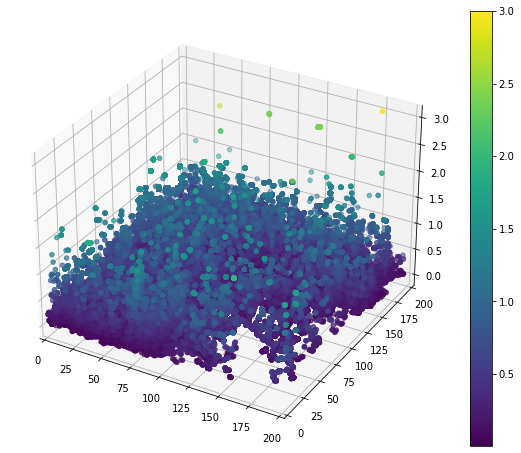

In [19]:
fig = pl.figure(figsize=(10,8), rasterized=True)
N = 1000000
ax = pl.axes(projection='3d')
plot = ax.scatter3D(SEGMENTS[:,0][:N], SEGMENTS[:,1][:N], SEGMENTS[:,6][:N], c=SEGMENTS[:,6][:N])
fig.colorbar(plot)
pl.xlim(0,200)
pl.ylim(0,200)

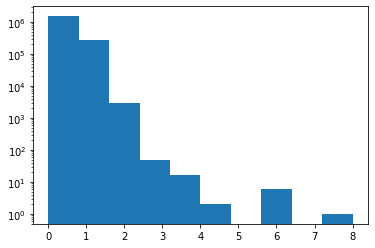

In [20]:
_ = pl.hist(SEGMENTS[:,6])
pl.yscale('log')

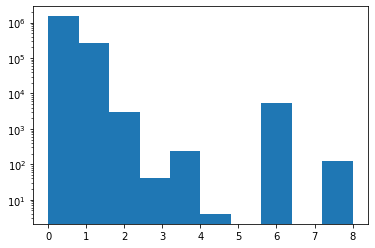

In [21]:
_ = pl.hist(SEGMENTS[:,7])
pl.yscale('log')